<a href="https://colab.research.google.com/github/PrasadReddyGaddam/PYTHON/blob/master/Assignment_37(09_07_20).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CSE-221710301019-PRASAD REDDY**

# Handwritten digit recognition

## Data Collection

### Importing required packages

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
%matplotlib inline

### Loading MNSIT Dataset

In [2]:
from keras.datasets.mnist import load_data

Using TensorFlow backend.


In [3]:
## load_data -- return value is two tuples train,test
(train_digits,train_labels),(test_digits,test_labels) = load_data()
print(train_digits.shape)
print(test_digits.shape)

(60000, 28, 28)
(10000, 28, 28)


- There are 600000 images in training and 10000 images in test data

- there are 0-9 a total of 10 classes

### Image count for each label in train data

In [4]:
pd.Series(train_labels).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

### Image count for each label in test data

In [5]:
pd.Series(test_labels).value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64

In [6]:
samples = np.random.randint(train_digits.shape[0],size=16)
samples

array([36065, 57110, 29342, 14021, 14681, 23197, 10377, 35541, 47000,
       17025, 47375, 51950, 48641, 11424, 51707,  5966])

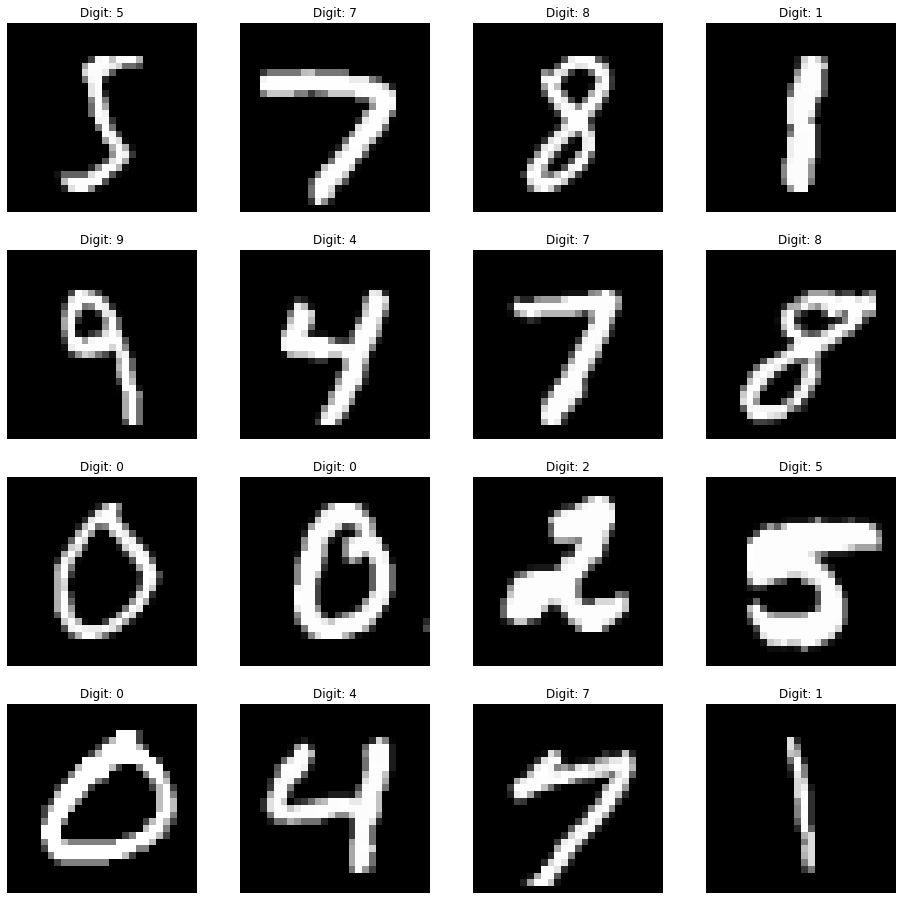

In [7]:
plt.figure(figsize=(16,16))
j = 1
for i in samples:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i],cmap='gray')
  plt.title("Digit: "+str(train_labels[i]))
  plt.axis('off')
  j += 1

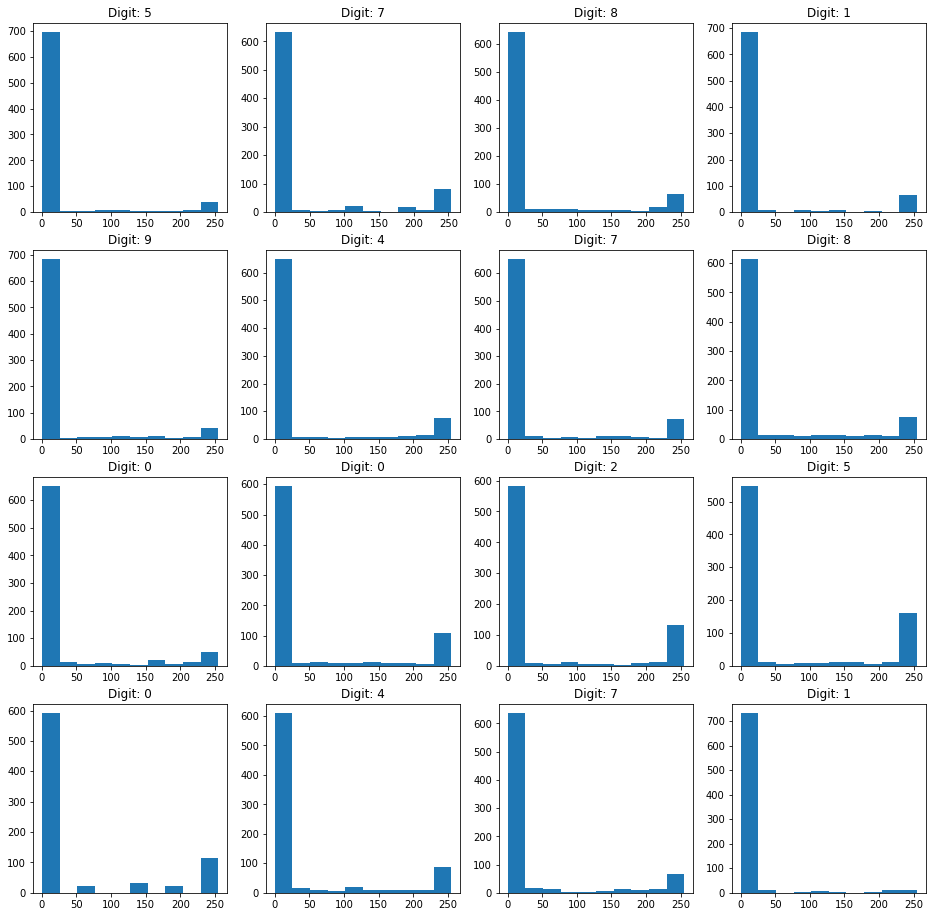

In [8]:
plt.figure(figsize=(16,16))
j = 1
for i in samples:
  plt.subplot(4,4,j)
  plt.hist(train_digits[i].flat)
  plt.title("Digit: "+str(train_labels[i]))
  #plt.axis('off')
  j += 1

### Preprocessing

 - Scaling 

In [9]:
## pixel values are from 0 to 255
train_digits_sc =  train_digits/255.0
test_digits_sc = test_digits/255.0

  - Convert labels into categorical values

In [10]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
from keras.utils import to_categorical
train_labels_cat = to_categorical(train_labels)

In [12]:
train_labels_cat[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [13]:
test_labels_cat = to_categorical(test_labels)
test_labels_cat[9]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_digits_sc,train_labels_cat,test_size=0.1,random_state=2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(54000, 28, 28)
(6000, 28, 28)
(54000, 10)
(6000, 10)


- Importing required methods

In [15]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

# MODEL 1

In [16]:
# we are creating a base model
model = Sequential()
#first layer
model.add(Flatten(input_shape=(28,28)))
# 784 pixel values as input to this Dense
model.add(Dense(128,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
#final layer
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 125,898
Trainable params: 125,898
Non-trainable params: 0
_________________________________________________________________


### Compile the model

In [17]:
model.compile(optimizer="adam",loss=tf.keras.losses.CategoricalCrossentropy(),metrics=["accuracy"])

### Train the model

In [18]:
history = model.fit(x=X_train,y=y_train,epochs=10,validation_data=(X_test,y_test),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 6s 108us/step - loss: 0.2408 - accuracy: 0.9262 - val_loss: 0.1620 - val_accuracy: 0.9465
Epoch 2/10
54000/54000 [==============================] - 6s 102us/step - loss: 0.1031 - accuracy: 0.9684 - val_loss: 0.0945 - val_accuracy: 0.9705
Epoch 3/10
54000/54000 [==============================] - 6s 103us/step - loss: 0.0736 - accuracy: 0.9767 - val_loss: 0.1116 - val_accuracy: 0.9670
Epoch 4/10
54000/54000 [==============================] - 6s 103us/step - loss: 0.0561 - accuracy: 0.9815 - val_loss: 0.1093 - val_accuracy: 0.9683
Epoch 5/10
54000/54000 [==============================] - 5s 102us/step - loss: 0.0470 - accuracy: 0.9850 - val_loss: 0.0864 - val_accuracy: 0.9743
Epoch 6/10
54000/54000 [==============================] - 6s 102us/step - loss: 0.0397 - accuracy: 0.9870 - val_loss: 0.0945 - val_accuracy: 0.9738
Epoch 7/10
54000/54000 [==============================] - 6s 10

In [19]:
model.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 29us/step


[0.10351938656155325, 0.9761999845504761]

In [20]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[4.4725560e-11, 1.8247124e-07, 1.9600685e-07, 2.2306666e-07,
        4.7451687e-09, 3.7898027e-12, 9.9839895e-14, 9.9999881e-01,
        2.3921620e-10, 4.4157639e-07]], dtype=float32)

In [21]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [22]:
model.predict_classes(np.expand_dims(test_digits_sc[5],axis=0))

array([1])

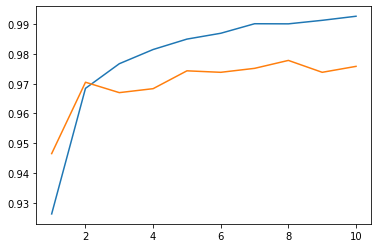

In [23]:
plt.plot(range(1,11),history.history['accuracy'])
plt.plot(range(1,11),history.history['val_accuracy'])


# MODEL 2

In [24]:
## We are creating the base model
model = Sequential()
# first layer
model.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the Layers
model.add(Dense(128,activation='relu')) # 784*128+128
model.add(Dense(128,activation='relu'))#128*128+128
model.add(Dense(64,activation='relu')) #128*64+64
model.add(Dense(256,activation='relu')) #128*64+64
model.add(Dense(128,activation='relu')) #128*64+64
# final layer
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 10)               

In [25]:
model.compile(optimizer ='adam',loss =tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [26]:
history =model.fit(x=X_train,y=y_train,epochs=10,validation_data=(X_test,y_test),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 7s 130us/step - loss: 0.2551 - accuracy: 0.9229 - val_loss: 0.1477 - val_accuracy: 0.9570
Epoch 2/10
54000/54000 [==============================] - 7s 128us/step - loss: 0.1215 - accuracy: 0.9637 - val_loss: 0.1358 - val_accuracy: 0.9590
Epoch 3/10
54000/54000 [==============================] - 7s 129us/step - loss: 0.0923 - accuracy: 0.9727 - val_loss: 0.1027 - val_accuracy: 0.9708
Epoch 4/10
54000/54000 [==============================] - 7s 128us/step - loss: 0.0744 - accuracy: 0.9781 - val_loss: 0.0935 - val_accuracy: 0.9715
Epoch 5/10
54000/54000 [==============================] - 7s 128us/step - loss: 0.0608 - accuracy: 0.9809 - val_loss: 0.0894 - val_accuracy: 0.9745
Epoch 6/10
54000/54000 [==============================] - 7s 129us/step - loss: 0.0520 - accuracy: 0.9839 - val_loss: 0.1150 - val_accuracy: 0.9727
Epoch 7/10
54000/54000 [==============================] - 7s 13

In [27]:
model.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 34us/step


[0.11196990839748687, 0.9782999753952026]

In [28]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[2.1049751e-13, 3.0643992e-08, 1.3157947e-07, 1.2036345e-07,
        1.5581193e-07, 2.1421588e-11, 3.7259444e-16, 9.9999785e-01,
        4.3722981e-10, 1.7282809e-06]], dtype=float32)

In [29]:
model.predict_classes(np.expand_dims(test_digits_sc[56],axis=0))

array([4])

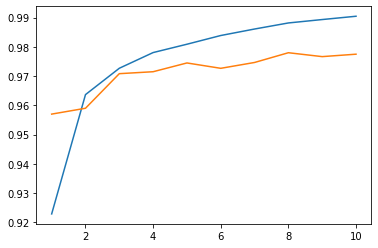

In [30]:
plt.plot(range(1,11),history.history['accuracy'])
plt.plot(range(1,11),history.history['val_accuracy'])

- The accuarcy andVal_Accuracy of the model 1 is :<br>[0.09088712198650173, 0.9796000123023987]
- The accuarcy andVal_Accuracy of the model 1 is :<br>[0.09636233940101228, 0.9750999808311462]

**Hence model 1 predicts better than model 2**